## Exploratory Data Analysis and Visualization
Here, we do some preliminary data exploration. First, we import packages and do a train/test split on the records with a PA form. We stratify on the results of the PA form (approved/denied).

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes
from sklearn.model_selection import train_test_split

In [2]:
cmm = pd.read_csv("Data/CMM.csv")

In [3]:
cmm_pa = cmm[cmm['dim_pa_id'].notna()]
cmm_pa_train, cmm_pa_test = train_test_split(cmm_pa, test_size = 0.2, 
                                             random_state = 10475, shuffle = True,
                                            stratify = cmm_pa.pa_approved)

We should only look at cmm_pa_train from this point.

We also compute how is_approved correlates with some other discrete variables. 

## pa_approved vs correct_diagnosis
Let's compute the correlation of pa_approved with correct diagnosis. 

In [4]:
#An auxilliary function to find the percentage of df[column1 == val1] given that df[column2 == val2 ]. 
def percentage_given(df, column1, val1, column2, val2):
    intersection = np.sum(np.logical_and(df[column1] == val1,df[column2] == val2));
    total = np.sum(df[column2] == val2);
    return np.round(100*intersection/total,3);

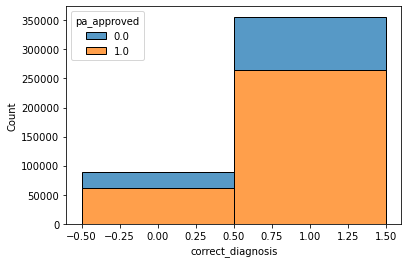

In [25]:
plt.figure()
sns.histplot(cmm_pa_train, x='correct_diagnosis', hue = 'pa_approved',multiple = 'stack',discrete=True)
plt.show()

In [6]:
print("The percentage of people whose PA is approved given that their diagnosis is correct is: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'correct_diagnosis',1))

print("The percentage of people whose PA is approved given that their diagnosis is incorrect is: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'correct_diagnosis',0))

The percentage of people whose PA is approved given that their diagnosis is correct is:  74.211
The percentage of people whose PA is approved given that their diagnosis is incorrect is:  70.379


## pa_approved vs contraindication
Now we compute the correlation between pa_approved and contraindication

TypeError: set_xlabel() missing 1 required positional argument: 'self'

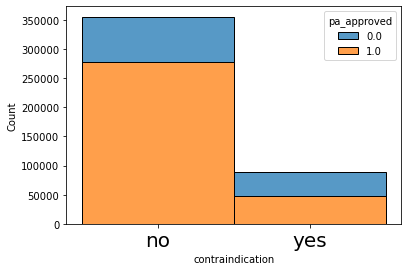

In [38]:
plt.figure()
sns.histplot(cmm_pa_train, x='contraindication', hue = 'pa_approved',multiple = 'stack',discrete=True)
plt.xticks(ticks=[0,1], labels=["no","yes"],fontsize=20)
matplotlib.axes.Axes.set_xlabel(xlabel='Contraindication',fontsize=30)
plt.show()


In [15]:
print("The percentage of people whose PA is approved given contraindication: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'contraindication',1))

print("The percentage of people whose PA is approved given no contraindication: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'contraindication',0))

The percentage of people whose PA is approved given contraindication:  53.851
The percentage of people whose PA is approved given no contraindication:  78.355


## pa_approved vs tried_and_failed


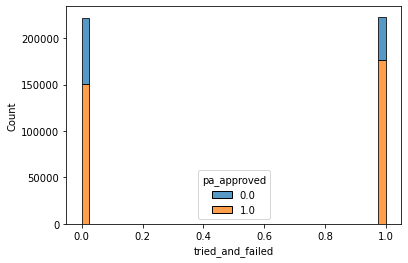

In [9]:
plt.figure()
sns.histplot(cmm_pa_train, x='tried_and_failed', hue = 'pa_approved',multiple = 'stack')
plt.show()

In [ ]:
print("The percentage of people whose PA is approved given that the patient has tried and failed generic alternatives: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'tried_and_failed',1))

print("The percentage of people whose PA is approved given that the patiend has not tried and failed the generic alternative: "
      , percentage_given(cmm_pa_train,'pa_approved',1,'tried_and_failed',0))

## pa_approved vs drug 

In [ ]:
plt.figure()
sns.histplot(cmm_pa_train, x='drug', hue = 'pa_approved',multiple = 'stack')
plt.show()

In [ ]:
drugs = ['A', 'B' , 'C']
for drug in drugs:
    print("The percentage of people whose PA is approved given that they use drug ", drug, "is : "
      , percentage_given(cmm_pa_train,'pa_approved',1,'drug',drug))

## pa_approved vs bin

In [23]:
#Takes a long time to run based on payer BIN, because it was a numpy int64. We change type to string,
#as there are only 4 payer BINs.

cmm_pa_train.loc[:,'binS']=cmm_pa_train.loc[:,'bin'].astype(str).copy()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved,binS
849303,849304,353147.0,737,417740,C,75.0,0,2019-01-07,2019,1,7,2,1,1,0,1.0,0.0,1.0,1.0,417740
1052005,1052006,437248.0,879,417614,A,70.0,0,2019-05-29,2019,5,29,4,1,1,0,1.0,1.0,0.0,1.0,417614
636661,636662,264336.0,564,417380,A,75.0,0,2018-07-18,2018,7,18,4,1,1,0,1.0,1.0,1.0,1.0,417380
151948,151949,63019.0,140,417740,B,70.0,0,2017-05-20,2017,5,20,7,0,0,0,0.0,1.0,1.0,0.0,417740
1214236,1214237,505068.0,1000,417740,C,75.0,0,2019-09-27,2019,9,27,6,1,1,0,1.0,0.0,0.0,1.0,417740


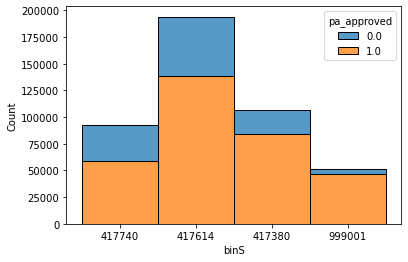

In [24]:
#Commented because it takes very long to run
plt.figure()
sns.histplot(cmm_pa_train, x='binS', hue = 'pa_approved',multiple = 'stack')
plt.show()

In [14]:
bins = cmm_pa_train.bin.unique()
for bin in bins:
    print("The percentage of people whose PA is approved given that they use the payer with BIN ", bin, "is : "
      , percentage_given(cmm_pa_train,'pa_approved',1,'bin',bin))

The percentage of people whose PA is approved given that they use the payer with BIN  417740 is :  62.908
The percentage of people whose PA is approved given that they use the payer with BIN  417614 is :  71.13
The percentage of people whose PA is approved given that they use the payer with BIN  417380 is :  78.606
The percentage of people whose PA is approved given that they use the payer with BIN  999001 is :  90.581
